<a href="https://colab.research.google.com/github/bomul0417/study/blob/main/NIDS_Project/Dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [2]:
df_url = '/content/drive/Othercomputers/My Computer/졸작/New_NSL-KDD.csv'

In [3]:
df = pd.read_csv(df_url)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
dfprobe = df.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 2)
dfr2l = dfprobe.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 3)
dfu2r = dfr2l.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 4)
newdf = dfu2r
newdf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
newdf.value_counts('label')

label
normal          77054
neptune         45871
2               14077
3                3882
smurf            3311
back             1315
teardrop          904
apache2           737
processtable      685
mailbomb          293
pod               242
4                 119
land               25
udpstorm            2
dtype: int64

In [6]:
newdf = newdf[(newdf.label != 2) & (newdf.label != 3) & (newdf.label != 4)]
newdf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148511,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back


In [7]:
newdf.value_counts('label')

label
normal          77054
neptune         45871
smurf            3311
back             1315
teardrop          904
apache2           737
processtable      685
mailbomb          293
pod               242
land               25
udpstorm            2
dtype: int64

In [8]:
for columns in newdf.columns:
  if newdf[columns].dtypes == 'object':
    print(columns, '\n종류:', newdf[columns].unique(), '\n개수:', newdf[columns].nunique(), '\n')

protocol_type 
종류: ['tcp' 'udp' 'icmp'] 
개수: 3 

service 
종류: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50' 'smtp'
 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp' 'bgp'
 'ldap' 'ecr_i' 'vmnet' 'systat' 'http_443' 'efs' 'whois' 'gopher' 'imap4'
 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell' 'time'
 'sql_net' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier' 'eco_i'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i' 'tftp_u'] 
개수: 65 

flag 
종류: ['SF' 'S0' 'REJ' 'RSTO' 'S1' 'RSTR' 'S3' 'S2' 'OTH' 'SH' 'RSTOS0'] 
개수: 11 

label 
종류: ['normal' 'neptune' 'teardrop' 'smurf' 'pod' 'back' 'land' 'apache2'
 'processtable' 'mailbomb' 'udpstorm'] 
개수: 11 



In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(newdf['protocol_type'])
protocol = le.transform(newdf['protocol_type'])

le.fit(newdf['service'])
service = le.transform(newdf['service'])

le.fit(newdf['flag'])
flag = le.transform(newdf['flag'])

le.fit(newdf['label'])
label = le.transform(newdf['label'])

newdf['protocol_type'] = protocol
newdf['service'] = service
newdf['flag'] = flag
newdf['label'] = label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [10]:
newdf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,5
1,0,2,40,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,5
2,0,1,44,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,4
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,5
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148511,0,0,14,9,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,8
148512,0,1,49,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,5
148513,0,1,22,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,5
148514,0,1,22,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1


In [11]:
#newdf.to_csv('/content/drive/Othercomputers/My Computer/졸작/dos.csv', mode='w')

In [12]:
df_X = newdf.drop(columns=['label'])
df_Y = newdf['label']

In [13]:
df_Y

0         5
1         5
2         4
3         5
4         5
         ..
148511    8
148512    5
148513    5
148514    1
148515    5
Name: label, Length: 130439, dtype: int64

In [14]:
df_Y.value_counts('label')

5     0.590728
4     0.351666
8     0.025384
1     0.010081
9     0.006930
0     0.005650
7     0.005251
3     0.002246
6     0.001855
2     0.000192
10    0.000015
Name: label, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler

#pd.options.display.float_format = '{:.9f}'.format #지수표현 X
#pd.reset_option('display.float_format') 

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(df_X)

xle = pd.DataFrame(np_scaled, columns = df_X.columns)

xle

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.296875,0.9,5.481041e-06,0.000000,0.0,0.0,0.0,0.000000,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.625000,0.9,1.629800e-06,0.000000,0.0,0.0,0.0,0.000000,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.687500,0.5,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.343750,0.9,2.589820e-06,0.001160,0.0,0.0,0.0,0.000000,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.343750,0.9,2.221440e-06,0.000060,0.0,0.0,0.0,0.000000,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0.0,0.0,0.218750,0.9,1.152023e-05,0.000000,0.0,0.0,0.0,0.000000,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
130435,0.0,0.5,0.765625,0.9,8.863435e-06,0.000047,0.0,0.0,0.0,0.000000,...,0.392157,0.552941,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
130436,0.0,0.5,0.343750,0.9,3.538676e-06,0.000133,0.0,0.0,0.0,0.000000,...,0.772549,1.000000,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
130437,0.0,0.5,0.343750,0.9,6.088309e-04,0.001183,0.0,0.0,0.0,0.019802,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07


In [16]:
from sklearn.model_selection import train_test_split

X, X_test, Y, Y_test = train_test_split(xle, df_Y, test_size=0.2, random_state=2022)

print(X.shape, Y.shape)
print(X_test.shape, Y_test.shape)

(104351, 41) (104351,)
(26088, 41) (26088,)


In [17]:
X2, X_val, Y2, Y_val = train_test_split(X, Y)
print(X2.shape, Y2.shape)
print(X_val.shape, Y_val.shape)

(78263, 41) (78263,)
(26088, 41) (26088,)


In [18]:
X_train = X.values
X_test = X_test.values
y_train = Y.values
y_test = Y_test.values
X_val = X_val.values
Y_val = Y_val.values

In [19]:
X_train_t = X_train.reshape(X_train.shape[0], 41, 1)
X_test_t = X_test.reshape(X_test.shape[0], 41, 1)
X_val_t = X_val.reshape(X_val.shape[0], 41, 1)
print(X_train_t.shape)
print(X_train_t)
print(X_val_t)
print(y_test)

(104351, 41, 1)
[[[0.        ]
  [0.5       ]
  [0.34375   ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.11964886]
  [1.        ]
  [0.625     ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [1.        ]
  [0.6875    ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.5       ]
  [0.296875  ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.5       ]
  [0.859375  ]
  ...
  [1.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.203125  ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]
[[[0.      ]
  [0.5     ]
  [0.34375 ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.      ]
  [0.21875 ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.5     ]
  [0.34375 ]
  ...
  [0.      ]
  [0.16    ]
  [0.56    ]]

 ...

 [[0.      ]
  [1.      ]
  [0.171875]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.      ]
  [0.21875 ]
 

In [20]:
from keras.utils import np_utils

y_test_en= np_utils.to_categorical(y_test)
y_train_en= np_utils.to_categorical(y_train)
Y_val_en= np_utils.to_categorical(Y_val)

In [23]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()
model = Sequential() 
model.add(LSTM(22, input_shape=(41,1), activation='relu')) 
#model.add(Dense(22, activation='relu')) 
model.add(Dense(11, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 22)                2112      
                                                                 
 dense (Dense)               (None, 11)                253       
                                                                 
Total params: 2,365
Trainable params: 2,365
Non-trainable params: 0
_________________________________________________________________


In [24]:
mod=model.fit(X_train_t, y_train_en, epochs=50, batch_size=128, validation_data=(X_val, Y_val_en))

Epoch 1/50
816/816 [==============================] - 28s 30ms/step - loss: 0.5294 - accuracy: 0.8307 - val_loss: 0.1767 - val_accuracy: 0.9598
Epoch 2/50
816/816 [==============================] - 19s 23ms/step - loss: 0.1446 - accuracy: 0.9618 - val_loss: 0.1164 - val_accuracy: 0.9652
Epoch 3/50
816/816 [==============================] - 18s 22ms/step - loss: 0.1741 - accuracy: 0.9554 - val_loss: 0.1087 - val_accuracy: 0.9706
Epoch 4/50
816/816 [==============================] - 18s 22ms/step - loss: 0.0942 - accuracy: 0.9760 - val_loss: 0.0791 - val_accuracy: 0.9801
Epoch 5/50
816/816 [==============================] - 18s 22ms/step - loss: 0.0823 - accuracy: 0.9786 - val_loss: 0.0863 - val_accuracy: 0.9783
Epoch 6/50
816/816 [==============================] - 19s 23ms/step - loss: 0.0757 - accuracy: 0.9795 - val_loss: 0.0756 - val_accuracy: 0.9811
Epoch 7/50
816/816 [==============================] - 20s 25ms/step - loss: 0.0699 - accuracy: 0.9807 - val_loss: 0.0608 - val_accuracy:

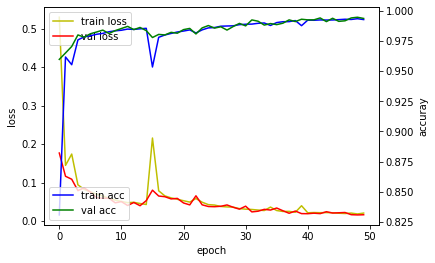

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(mod.history['loss'], 'y', label='train loss')
loss_ax.plot(mod.history['val_loss'], 'r', label='val loss')

acc_ax.plot(mod.history['accuracy'], 'b', label='train acc')
acc_ax.plot(mod.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()